## Get Data

In [ ]:
# From Google Drive
import gdown
gdown.download('https://drive.google.com/uc?id=1sphgBp6OLZ5xWVXpeBEwKVhgovDQdNJp', 
               '../data/images.zip', quiet=False)

# # From Dropbox
# # If you have Windows OS and don't have `wget` installed, download from: https://eternallybored.org/misc/wget/
# !wget -c -O ../data/trial.zip --no-check-certificate \
# 'https://www.dropbox.com/scl/fi/2w1y67p7turdo3w1vfh8p/images.zip?rlkey=bpfxk4jp3e56zca2iulspz627&dl=0'

In [ ]:
# Windows
!powershell expand-archive ../data/images.zip ../data/images
!rename "../data/images" "images_1"
!move "../data/images_1/images" "../data/"
!rmdir /s /q "../data/images_1"
# Linux
# !zip -FF ../data/images.zip -O ../data/images_fixed.zip
# !unzip ../data/images_fixed.zip

## Data Manipulation

In [1]:
import pandas as pd


# Specify the path to the CSV file. Replace with the actual path to the CSV file
# path_to_dir = 'G:/My Drive/fashion-dataset/'
path_to_dir = '../data/'
csv_file = "styles.csv"
csv_file_path = path_to_dir + csv_file

# Define the list of column indices or names to read from the CSV file
columns_to_read = list(range(0, 5)) + [6] + [8]  # Columns 1 to 7 and column 9

# Read the specified columns into a pandas DataFrame
df = pd.read_csv(csv_file_path, usecols=columns_to_read)

# Print the DataFrame
df

,id,gender,masterCategory,subCategory,articleType,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Summer,Casual
2,59263,Women,Accessories,Watches,Watches,Winter,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Summer,Casual
...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,Summer,Casual
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Summer,Casual
44443,18842,Men,Apparel,Topwear,Tshirts,Fall,Casual
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Spring,Casual


In [2]:
# Iterate through each column in the DataFrame and print its unique values
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique values for column '{column_name}': {len(unique_values)}")
    print(unique_values)
    print()

Unique values for column 'id': 44446
[15970 39386 59263 ... 18842 46694 51623]

Unique values for column 'gender': 5
['Men' 'Women' 'Boys' 'Girls' 'Unisex']

Unique values for column 'masterCategory': 7
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']

Unique values for column 'subCategory': 45
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']

Unique values for column 'articleType': 143
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Bel

We will **only** match Apparel...

In [50]:
df = df[df['masterCategory'] == 'Apparel']
df

,id,gender,masterCategory,subCategory,articleType,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Summer,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Summer,Casual
5,1855,Men,Apparel,Topwear,Tshirts,Summer,Casual
...,...,...,...,...,...,...,...
44436,30614,Men,Apparel,Topwear,Tshirts,Summer,Sports
44437,13496,Men,Apparel,Topwear,Tshirts,Fall,Casual
44439,12544,Women,Apparel,Topwear,Tshirts,Fall,Casual
44440,42234,Women,Apparel,Topwear,Tops,Summer,Casual


In [51]:
# Iterate through each column in the DataFrame and again print its unique values
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique values for column '{column_name}':")
    print(unique_values)
    print()

Unique values for column 'id':
[15970 39386 21379 ... 12544 42234 18842]

Unique values for column 'gender':
['Men' 'Women' 'Girls' 'Boys' 'Unisex']

Unique values for column 'masterCategory':
['Apparel']

Unique values for column 'subCategory':
['Topwear' 'Bottomwear' 'Innerwear' 'Saree' 'Dress'
 'Loungewear and Nightwear' 'Apparel Set' 'Socks']

Unique values for column 'articleType':
['Shirts' 'Jeans' 'Track Pants' 'Tshirts' 'Tops' 'Bra' 'Sweatshirts'
 'Kurtas' 'Waistcoat' 'Shorts' 'Briefs' 'Sarees' 'Innerwear Vests'
 'Rain Jacket' 'Dresses' 'Night suits' 'Skirts' 'Blazers' 'Kurta Sets'
 'Shrug' 'Trousers' 'Camisoles' 'Boxers' 'Dupatta' 'Capris' 'Bath Robe'
 'Tunics' 'Jackets' 'Trunk' 'Lounge Pants' 'Sweaters' 'Tracksuits'
 'Swimwear' 'Nightdress' 'Baby Dolls' 'Leggings' 'Kurtis' 'Jumpsuit'
 'Suspenders' 'Robe' 'Salwar and Dupatta' 'Patiala' 'Stockings' 'Tights'
 'Churidar' 'Lounge Tshirts' 'Lounge Shorts' 'Shapewear' 'Nehru Jackets'
 'Salwar' 'Jeggings' 'Rompers' 'Booties' 'Lehenga

We will **not** match innerwear...

In [52]:
# Print the unique article types for the specified condition
print("Unique article types for subCategory 'Innerwear':")
df[df['subCategory'] == 'Innerwear']['articleType'].unique()

Unique article types for subCategory 'Innerwear':


array(['Bra', 'Briefs', 'Innerwear Vests', 'Camisoles', 'Boxers', 'Trunk',
       'Shapewear'], dtype=object)

We will **not** match Saree...

In [53]:
# Print the unique article types for the specified condition
print("Unique article types for subCategory 'Saree':")
df[df['subCategory'] == 'Saree']['articleType'].unique()

Unique article types for subCategory 'Saree':


array(['Sarees'], dtype=object)

We will **not** match whole-body clothes like dresses and jumpsuits...

In [54]:
# Print the unique article types for the specified condition
print("Unique article types for subCategory 'Dress':")
df[df['subCategory'] == 'Dress']['articleType'].unique()

Unique article types for subCategory 'Dress':


array(['Dresses', 'Jumpsuit'], dtype=object)

From Loungewear and Nightwear we will **not** match 'Night suits', 'Bath Robe', 'Nightdress', 'Baby Dolls', 'Robe'.

We will **only** match 'Lounge Pants', 'Lounge Tshirts', 'Lounge Shorts' and 'Shorts'

In [55]:
# Print the unique article types for the specified condition
print("Unique article types for subCategory 'Loungewear and Nightwear':")
df[df['subCategory'] == 'Loungewear and Nightwear']['articleType'].unique()

Unique article types for subCategory 'Loungewear and Nightwear':


array(['Night suits', 'Bath Robe', 'Lounge Pants', 'Nightdress',
       'Baby Dolls', 'Robe', 'Lounge Tshirts', 'Lounge Shorts', 'Shorts'],
      dtype=object)

We will **not** match Apparel Set...

In [56]:
# Print the unique article types for the specified condition
print("Unique article types for subCategory 'Apparel Set':")
df[df['subCategory'] == 'Apparel Set']['articleType'].unique()

Unique article types for subCategory 'Apparel Set':


array(['Kurta Sets', 'Clothing Set', 'Swimwear'], dtype=object)

We will **not** match Booties...

In [57]:
# Print the unique article types for the specified condition
print("Unique article types for subCategory 'Socks':")
df[df['subCategory'] == 'Socks']['articleType'].unique()

Unique article types for subCategory 'Socks':


array(['Booties'], dtype=object)

We will **not** match also the following: 

'Waistcoat', 'Blazers', 'Shrug', 'Dupatta', 'Swimwear', 'Suspenders', 'Salwar and Dupatta', 'Stockings', 'Tights', 'Nehru Jackets', 'Dresses', 'Lehenga Choli', 'Belts', 'Suits', 'Rompers'.

In [58]:
df = df[
    (df['subCategory'].isin(['Topwear', 'Bottomwear', 'Loungewear and Nightwear'])) &
    (~df['articleType'].isin(['Night suits', 'Bath Robe', 'Nightdress', 'Baby Dolls', 'Robe', 'Waistcoat', 'Blazers', 
                              'Shrug', 'Dupatta', 'Swimwear', 'Suspenders', 'Salwar and Dupatta', 'Stockings', 'Tights', 
                              'Nehru Jackets', 'Dresses', 'Lehenga Choli', 'Belts', 'Suits', 'Rompers', 'Tracksuits']))
]

df = df.drop("masterCategory", axis=1)
df

,id,gender,subCategory,articleType,season,usage
0,15970,Men,Topwear,Shirts,Fall,Casual
1,39386,Men,Bottomwear,Jeans,Summer,Casual
3,21379,Men,Bottomwear,Track Pants,Fall,Casual
4,53759,Men,Topwear,Tshirts,Summer,Casual
5,1855,Men,Topwear,Tshirts,Summer,Casual
...,...,...,...,...,...,...
44436,30614,Men,Topwear,Tshirts,Summer,Sports
44437,13496,Men,Topwear,Tshirts,Fall,Casual
44439,12544,Women,Topwear,Tshirts,Fall,Casual
44440,42234,Women,Topwear,Tops,Summer,Casual


We will not use `Ethnic` clothes

In [59]:
df = df[(~df['usage'].isin(['Ethnic']))]

We will not use `Unisex`, `Boys`, and `Girls` clothes

In [60]:
df = df[(~df['gender'].isin(['Girls','Boys','Unisex']))]

We will not use `Lounge Pants`, `Lounge Shorts`, `Jeggings`, `Kurtas`, `Rain Jacket`, `Lounge Tshirts`, `Kurtis`, and `Rain Trousers` clothes

In [61]:
df = df[(~df['articleType'].isin(['Lounge Pants','Lounge Shorts','Jeggings','Kurtas','Rain Jacket',
                                  'Lounge Tshirts','Kurtis','Rain Trousers' ]))]

In [62]:
# Iterate through each column in the DataFrame and print again its unique values
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique values for column '{column_name}':")
    print(unique_values)
    print()

Unique values for column 'id':
[15970 39386 21379 ... 12544 42234 18842]

Unique values for column 'gender':
['Men' 'Women']

Unique values for column 'subCategory':
['Topwear' 'Bottomwear' 'Loungewear and Nightwear']

Unique values for column 'articleType':
['Shirts' 'Jeans' 'Track Pants' 'Tshirts' 'Sweatshirts' 'Shorts' 'Tops'
 'Skirts' 'Trousers' 'Tunics' 'Jackets' 'Sweaters' 'Capris' 'Leggings']

Unique values for column 'season':
['Fall' 'Summer' 'Spring' 'Winter' nan]

Unique values for column 'usage':
['Casual' 'Formal' 'Sports' 'Smart Casual' nan 'Party' 'Travel']



In [63]:
df[pd.isna(df['season']) | pd.isna(df['usage'])].sort_values(by='id')

,id,gender,subCategory,articleType,season,usage
26994,26365,Women,Topwear,Shirts,Summer,NaN
1184,26367,Women,Topwear,Shirts,Summer,NaN
42404,26370,Women,Topwear,Shirts,Summer,NaN
21285,53781,Men,Topwear,Tshirts,NaN,Sports


In [64]:
# Update the 'usage' column where 'usage' is NaN and 'articleType' is in the specified list
df.loc[
    (df['usage'].isna()) & (df['articleType'].isin(['Rain Trousers', 'Rain Jacket'])),
    'usage'
] = 'Casual'

df.loc[
    (df['usage'].isna()) & (df['articleType'].isin(['Shirts'])),
    'usage'
] = 'Formal'

In [65]:
# Update the 'season' column where 'season' is NaN and 'articleType' is Tshirt
df.loc[
    (df['season'].isna()) & (df['articleType'].isin(['Tshirts'])),
    'season'
] = 'Summer'

In [66]:
df[df['subCategory'] == 'Loungewear and Nightwear']['articleType'].unique()

array(['Shorts'], dtype=object)

Delete `Loungewear and Nightwear` subCategory...

In [67]:
df.loc[(df['articleType'].isin(['Shorts'])), 'subCategory'] = 'Bottomwear'

In [68]:
df[df['subCategory'] == 'Loungewear and Nightwear']['articleType'].unique()

array([], dtype=object)

In [69]:
df

,id,gender,subCategory,articleType,season,usage
0,15970,Men,Topwear,Shirts,Fall,Casual
1,39386,Men,Bottomwear,Jeans,Summer,Casual
3,21379,Men,Bottomwear,Track Pants,Fall,Casual
4,53759,Men,Topwear,Tshirts,Summer,Casual
5,1855,Men,Topwear,Tshirts,Summer,Casual
...,...,...,...,...,...,...
44436,30614,Men,Topwear,Tshirts,Summer,Sports
44437,13496,Men,Topwear,Tshirts,Fall,Casual
44439,12544,Women,Topwear,Tshirts,Fall,Casual
44440,42234,Women,Topwear,Tops,Summer,Casual


In [70]:
# Iterate through each column in the DataFrame and print its unique values
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique values for column '{column_name}':")
    print(unique_values)
    print()

Unique values for column 'id':
[15970 39386 21379 ... 12544 42234 18842]

Unique values for column 'gender':
['Men' 'Women']

Unique values for column 'subCategory':
['Topwear' 'Bottomwear']

Unique values for column 'articleType':
['Shirts' 'Jeans' 'Track Pants' 'Tshirts' 'Sweatshirts' 'Shorts' 'Tops'
 'Skirts' 'Trousers' 'Tunics' 'Jackets' 'Sweaters' 'Capris' 'Leggings']

Unique values for column 'season':
['Fall' 'Summer' 'Spring' 'Winter']

Unique values for column 'usage':
['Casual' 'Formal' 'Sports' 'Smart Casual' 'Party' 'Travel']



In [71]:
import pathlib


# Define a custom function to concatenate the strings
def create_image_path(row, path_to_dir):
    path = path_to_dir + 'images/'
    suffix = '.jpg'
    return path + str(row['id']) + suffix


df['image_path'] = df.apply(create_image_path, path_to_dir=path_to_dir, axis=1)

# Display the resulting DataFrame with the new 'image_path' column
df

,id,gender,subCategory,articleType,season,usage,image_path
0,15970,Men,Topwear,Shirts,Fall,Casual,../data/images/15970.jpg
1,39386,Men,Bottomwear,Jeans,Summer,Casual,../data/images/39386.jpg
3,21379,Men,Bottomwear,Track Pants,Fall,Casual,../data/images/21379.jpg
4,53759,Men,Topwear,Tshirts,Summer,Casual,../data/images/53759.jpg
5,1855,Men,Topwear,Tshirts,Summer,Casual,../data/images/1855.jpg
...,...,...,...,...,...,...,...
44436,30614,Men,Topwear,Tshirts,Summer,Sports,../data/images/30614.jpg
44437,13496,Men,Topwear,Tshirts,Fall,Casual,../data/images/13496.jpg
44439,12544,Women,Topwear,Tshirts,Fall,Casual,../data/images/12544.jpg
44440,42234,Women,Topwear,Tops,Summer,Casual,../data/images/42234.jpg


In [72]:
import os


# Function to check if a file exists
def file_exists(filepath):
    return os.path.isfile(filepath)

# Create a boolean mask for valid file paths
valid_mask = df['image_path'].apply(file_exists)

# Filter the DataFrame to keep only rows with valid file paths
df = df[valid_mask]

# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
df

,id,gender,subCategory,articleType,season,usage,image_path
0,15970,Men,Topwear,Shirts,Fall,Casual,../data/images/15970.jpg
1,39386,Men,Bottomwear,Jeans,Summer,Casual,../data/images/39386.jpg
2,21379,Men,Bottomwear,Track Pants,Fall,Casual,../data/images/21379.jpg
3,53759,Men,Topwear,Tshirts,Summer,Casual,../data/images/53759.jpg
4,1855,Men,Topwear,Tshirts,Summer,Casual,../data/images/1855.jpg
...,...,...,...,...,...,...,...
14154,30614,Men,Topwear,Tshirts,Summer,Sports,../data/images/30614.jpg
14155,13496,Men,Topwear,Tshirts,Fall,Casual,../data/images/13496.jpg
14156,12544,Women,Topwear,Tshirts,Fall,Casual,../data/images/12544.jpg
14157,42234,Women,Topwear,Tops,Summer,Casual,../data/images/42234.jpg


In [73]:
import plotly.graph_objects as go
def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
    if labels[0] == 'Blue':
        colors = labels
        fig.update_traces(marker=dict(colors=colors, line=dict(color='white', width=2)))
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [74]:
plot_distribution(df['gender'])

In [75]:
plot_distribution(df['season'])

In [76]:
plot_distribution(df['usage'])

In [77]:
plot_distribution(df['subCategory'])

In [78]:
plot_distribution(df['articleType'])

In [79]:
print('--- Old ---\n')
print(df['usage'].value_counts())
df.loc[(df['usage'].isin(['Smart Casual', 'Party', 'Travel'])), 'usage'] = 'Casual'
print('\n--- New ---\n')
print(df['usage'].value_counts())

--- Old ---

usage
Casual          11522
Sports           1490
Formal           1123
Smart Casual       20
Party               3
Travel              1
Name: count, dtype: int64

--- New ---

usage
Casual    11546
Sports     1490
Formal     1123
Name: count, dtype: int64


In [80]:
print('--- Old ---\n')
print(df['season'].value_counts())
df.loc[(df['season'].isin(['Spring', 'Summer'])), 'season'] = 'Spring/Summer'
df.loc[(df['season'].isin(['Fall', 'Winter'])), 'season'] = 'Fall/Winter'
print('\n--- New ---\n')
print(df['season'].value_counts())

--- Old ---

season
Summer    7609
Fall      6123
Winter     300
Spring     127
Name: count, dtype: int64

--- New ---

season
Spring/Summer    7736
Fall/Winter      6423
Name: count, dtype: int64


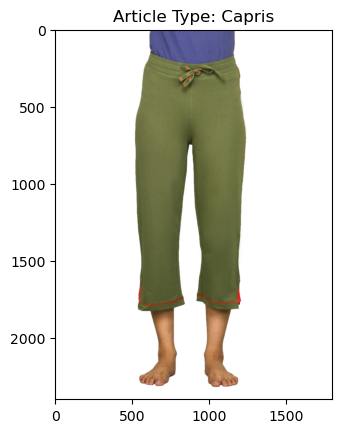

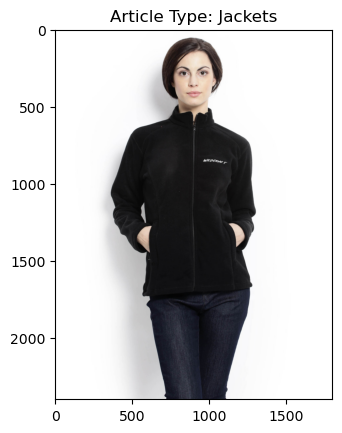

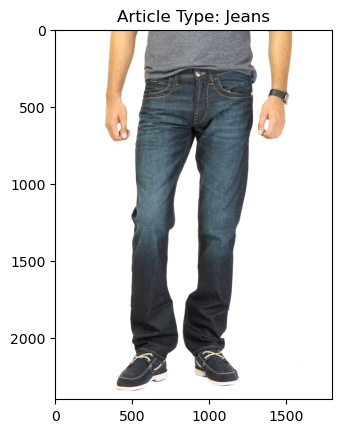

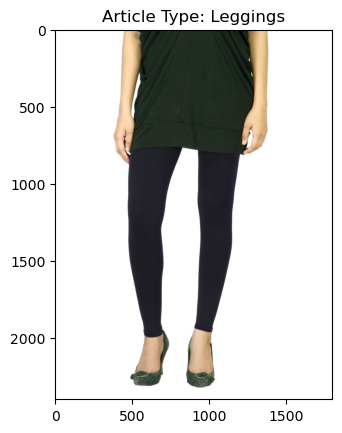

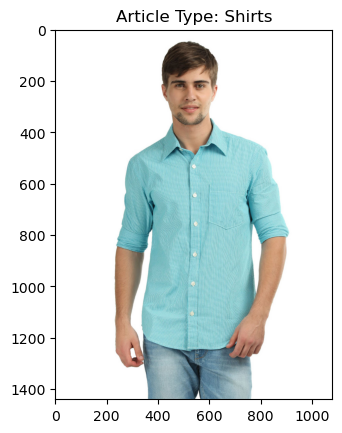

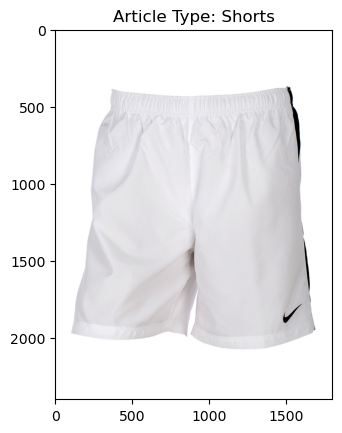

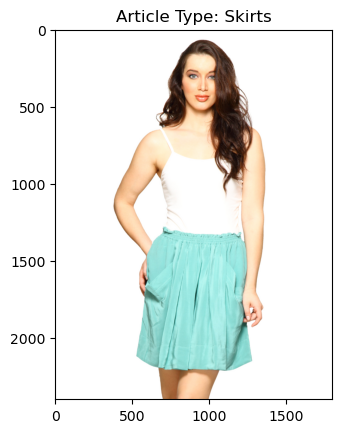

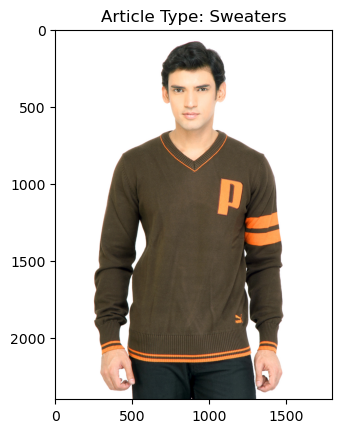

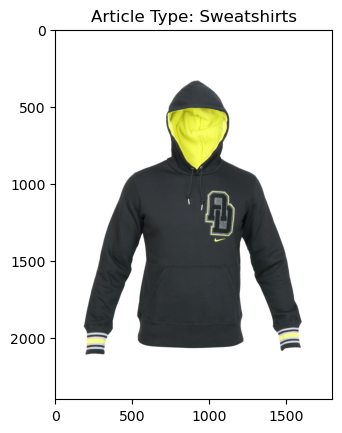

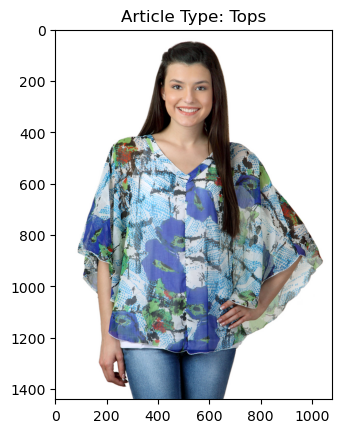

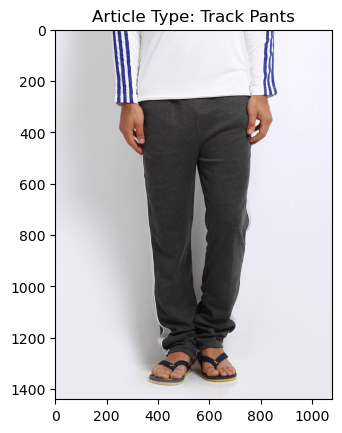

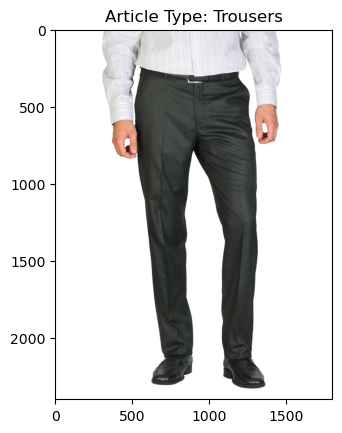

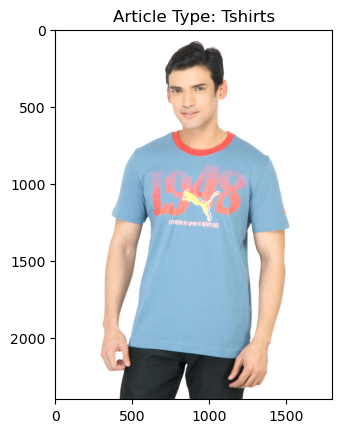

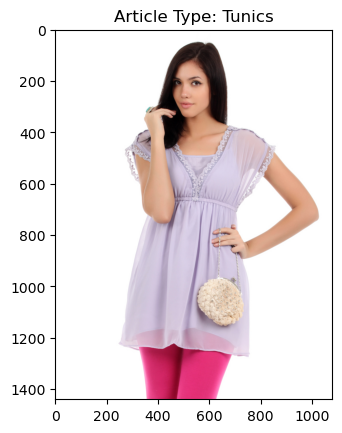

In [81]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing image paths and articleType
# Assuming 'data_directory' is the base directory where images are stored

# Group the DataFrame by 'articleType' and select the first image path per group
grouped = df.groupby('articleType').last()

# Loop through the groups and display one image per 'articleType'
for index, row in grouped.iterrows():
    article_type = index
    image_path = row['image_path']
    
    # Load and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Article Type: {article_type}")
    plt.show()

In [82]:
df

,id,gender,subCategory,articleType,season,usage,image_path
0,15970,Men,Topwear,Shirts,Fall/Winter,Casual,../data/images/15970.jpg
1,39386,Men,Bottomwear,Jeans,Spring/Summer,Casual,../data/images/39386.jpg
2,21379,Men,Bottomwear,Track Pants,Fall/Winter,Casual,../data/images/21379.jpg
3,53759,Men,Topwear,Tshirts,Spring/Summer,Casual,../data/images/53759.jpg
4,1855,Men,Topwear,Tshirts,Spring/Summer,Casual,../data/images/1855.jpg
...,...,...,...,...,...,...,...
14154,30614,Men,Topwear,Tshirts,Spring/Summer,Sports,../data/images/30614.jpg
14155,13496,Men,Topwear,Tshirts,Fall/Winter,Casual,../data/images/13496.jpg
14156,12544,Women,Topwear,Tshirts,Fall/Winter,Casual,../data/images/12544.jpg
14157,42234,Women,Topwear,Tops,Spring/Summer,Casual,../data/images/42234.jpg


In [83]:
df['articleType'].value_counts()

articleType
Tshirts        6360
Shirts         3123
Tops           1487
Jeans           559
Trousers        518
Shorts          456
Track Pants     303
Sweatshirts     281
Sweaters        277
Jackets         250
Tunics          202
Capris          127
Leggings        123
Skirts           93
Name: count, dtype: int64

In [84]:
category_df = df[df["articleType"] == 'Jeans']
sample_row = category_df.sample(n=1).iloc[0]
sample_row

id                                27018
gender                            Women
subCategory                  Bottomwear
articleType                       Jeans
season                    Spring/Summer
usage                            Casual
image_path     ../data/images/27018.jpg
Name: 516, dtype: object

In [88]:
import cv2
import numpy as np
import os
import shutil


# Define a custom function to concatenate the strings
def create_image_path(row, path_to_dir):
    path = path_to_dir + '/'
    suffix = '.jpg'
    return path + str(row['id']) + suffix

# Define the directory where your original images are stored and where augmented images will be saved.
augmented_data_dir = path_to_dir + 'augmented_images'

# Define the list of unique categories in your DataFrame
categories = df["articleType"].unique()

# Desired number of augmented images per category.
desired_augmentation_count = 1000  # Adjust as needed

# Create a new df to store new rows
df2 = pd.DataFrame()

# Loop through each category
for category in categories:
    # Create the directory for the current category in the augmented data directory
    category_augmented_dir = os.path.join(augmented_data_dir, category)
    os.makedirs(category_augmented_dir, exist_ok=True)

    # Filter the DataFrame to get only rows corresponding to the current category
    category_df = df[df["articleType"] == category]

    # Calculate the number of images needed for augmentation
    num_original_images = len(category_df)
    num_augmentations_needed = desired_augmentation_count - num_original_images

    # Specify folder
    destination_folder = path_to_dir + 'augmented_images/' + category

    if num_augmentations_needed <= 0:
        num_augmentations_needed = 0
        sample_rows = category_df.sample(n=1000, replace=False)
        # Iterate through the DataFrame and copy each file to the destination folder
        for _, row in sample_rows.iterrows():
            shutil.copy(row['image_path'], destination_folder)
        sample_rows['image_path'] = sample_rows.apply(create_image_path, path_to_dir=destination_folder, axis=1)
        df2 = pd.concat([df2, pd.DataFrame(sample_rows)], ignore_index=True)
    else:
        for _, row in category_df.iterrows():
            shutil.copy(row['image_path'], destination_folder)
        category_df.loc[:,'image_path'] = category_df.apply(create_image_path, path_to_dir=destination_folder, axis=1)
        df2 = pd.concat([df2, category_df], ignore_index=True)
        # Loop through the original image paths and apply augmentations
        # Apply random transformations (e.g., rotation, scaling, flipping)
        for i in range(num_augmentations_needed):
            row = category_df.sample(n=1).iloc[0]
            # Read the original image using OpenCV
            image = cv2.imread(row["image_path"])
            augmented_image = image.copy()
            # Randomly choose transformations
            if np.random.rand() < 0.5:
                augmented_image = cv2.flip(augmented_image, 1)  # Horizontal flip

            angle = np.random.randint(-30, 30)  # Rotate between -30 and 30 degrees
            scale = np.random.uniform(0.8, 1.2)  # Scale between 0.8 and 1.2
            height, width, _ = augmented_image.shape
            rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, scale)
            augmented_image = cv2.warpAffine(augmented_image, rotation_matrix, (width, height))

            # Save the augmented image
            augmented_image_filename = f"{i}_augm_{row['image_path'].split('/')[-1].split('.')[0]}.jpg"
            augmented_image_path = os.path.join(category_augmented_dir, augmented_image_filename)
            cv2.imwrite(augmented_image_path, augmented_image)

            # Update the DataFrame with the new image path
            row["image_path"] = destination_folder + '/' + augmented_image_filename
            df2 = pd.concat([df2, pd.DataFrame([row])], ignore_index=True)

    print(f"Augmented {category} category with {num_augmentations_needed} images.")

print("Data augmentation complete.")

Augmented Shirts category with 0 images.
Augmented Jeans category with 441 images.
Augmented Track Pants category with 697 images.
Augmented Tshirts category with 0 images.
Augmented Sweatshirts category with 719 images.
Augmented Shorts category with 544 images.
Augmented Tops category with 0 images.
Augmented Skirts category with 907 images.
Augmented Trousers category with 482 images.
Augmented Tunics category with 798 images.
Augmented Jackets category with 750 images.
Augmented Sweaters category with 723 images.
Augmented Capris category with 873 images.
Augmented Leggings category with 877 images.
Data augmentation complete.


In [89]:
plot_distribution(df2['gender'])

In [90]:
plot_distribution(df2['subCategory'])

In [91]:
plot_distribution(df2['articleType'])

In [92]:
plot_distribution(df2['season'])

In [93]:
plot_distribution(df2['usage'])

In [94]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# # Decode the encoded labels back to original categorical values
# label_encoder.inverse_transform(df['gender_enc'].astype('int').unique())
# .astype('float32')
df2['gender_enc'] = np.asarray(label_encoder.fit_transform(df2['gender'])).reshape((-1,1))
df2['subCategory_enc'] = np.asarray(label_encoder.fit_transform(df2['subCategory'])).reshape((-1,1))
df2['articleType_enc'] = np.asarray(label_encoder.fit_transform(df2['articleType'])).reshape((-1,1))
# df['baseColour_enc'] = np.asarray(label_encoder.fit_transform(df['baseColour'])).reshape((-1,1))
df2['season_enc'] = np.asarray(label_encoder.fit_transform(df2['season'])).reshape((-1,1))
df2['usage_enc'] = np.asarray(label_encoder.fit_transform(df2['usage'])).reshape((-1,1))

In [95]:
df2

,id,gender,subCategory,articleType,season,usage,image_path,gender_enc,subCategory_enc,articleType_enc,season_enc,usage_enc
0,9605,Men,Topwear,Shirts,Fall/Winter,Casual,../data/augmented_images/Shirts/9605.jpg,0,1,4,0,0
1,6708,Men,Topwear,Shirts,Spring/Summer,Casual,../data/augmented_images/Shirts/6708.jpg,0,1,4,1,0
2,9648,Men,Topwear,Shirts,Fall/Winter,Formal,../data/augmented_images/Shirts/9648.jpg,0,1,4,0,1
3,29769,Men,Topwear,Shirts,Spring/Summer,Casual,../data/augmented_images/Shirts/29769.jpg,0,1,4,1,0
4,14526,Men,Topwear,Shirts,Fall/Winter,Formal,../data/augmented_images/Shirts/14526.jpg,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,33717,Women,Bottomwear,Leggings,Spring/Summer,Casual,../data/augmented_images/Leggings/872_augm_337...,1,0,3,1,0
13996,25036,Women,Bottomwear,Leggings,Fall/Winter,Casual,../data/augmented_images/Leggings/873_augm_250...,1,0,3,0,0
13997,22463,Women,Bottomwear,Leggings,Fall/Winter,Casual,../data/augmented_images/Leggings/874_augm_224...,1,0,3,0,0
13998,23045,Women,Bottomwear,Leggings,Fall/Winter,Casual,../data/augmented_images/Leggings/875_augm_230...,1,0,3,0,0


In [96]:
df2.to_csv((path_to_dir + 'df.csv'), sep='\t', index=False)